# Newton polynomial
 
$$
P_3(x) = a_0+ a_1 (x-x_0) + a_2(x-x_0)(x-x_1)+ a_3(x-x_0)(x-x_1)(x-x_2)$$

that interpolates the points 
$$
\begin{array} {l}
(x_0,y_0)=(-1,1)\\
(x_1,y_1)=(0,1)\\
(x_2,y_2)=(1,2)\\
(x_3,y_3)=(2,0)
\end{array}$$

Replacing the polynomial expresion in $x_0,x_1$ and $x_2$
 we have 
 $$
\begin{array} {llll}
P_3(x_0)= a_0&  &  & & =y_0 \\
P_3(x_1)= a_0&+a_1 (x_1-x_0)  &  & & =y_1 \\
P_3(x_2)= a_0&+a_1 (x_2-x_0)  &+ a_2(x_2-x_0)(x_2-x_1)  & & =y_2 \\
P_3(x_3)= a_0&+a_1 (x_3-x_0)  &+ a_2(x_3-x_0)(x_3-x_1)  &+a_3(x_3-x_0)(x_3-x_1)(x_3-x_2) & =y_3\\
\end{array}
$$
In matrix form is the following linear system of equations 

$$
X = 
\left[
\begin{array}{ccccc}
1 & 0 & 0  & 0\\
1 & (x_1-x_0)  & 0  & 0 \\
1 & (x_2-x_0) & (x_2-x_0)(x_2-x_1)  & 0\\
1 & (x_3-x_0) &(x_3-x_0)(x_3-x_1) & (x_3-x_0)(x_3-x_1)(x_3-x_2) 
\end{array}
\right]
\left(
\begin{array}{r}
a_0 \\
a_1 \\
a_2
\end{array}
\right)
= 
\left(
\begin{array}{r}
y_0 \\
y_1 \\
y_2
\end{array}
\right)
$$



In [86]:
def f(z,i):
    z = np.array(z)
    fv = np.ones(z.shape[0])
    if i==0: 
       return fv
    for k in range(1,i+1):
        fv = fv * (z - x[k-1])
    return fv


def Newton_matrix(x,m):
    '''
    Constructing design polynolial matrix for given nodes and power
    '''
    x = np.array(x)
    A = np.column_stack([f(x,k)**k for k in range(0,m)])
        
    return A

[ 1.          2.         -0.75        0.09259259]


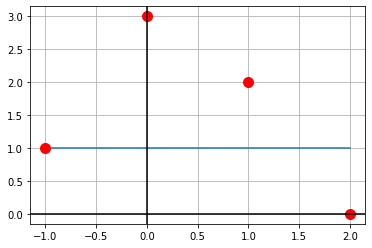

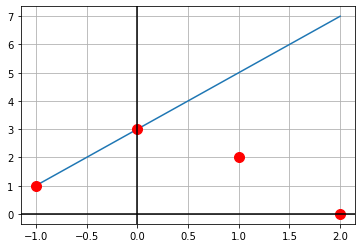

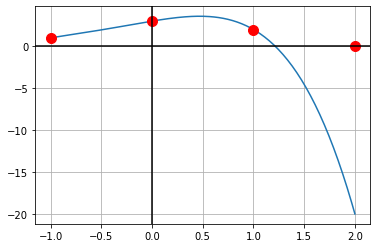

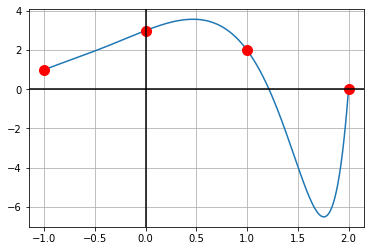

In [39]:
import scipy.linalg as la
import matplotlib.pyplot as plt



x = np.array([-1, 0, 1, 2]) # x coordinates in space
y = np.array([1, 3, 2, 0]) # f(x)

m=len(x) 
a = la.solve(Newton_matrix(x,m),y)
print(a)

m=1
xs = np.linspace(-1,2,20)
ys = sum([a[k]*f(xs,k)**k for k in range(0,m)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=2
xs = np.linspace(-1,2,200)
ys = sum([a[k]*f(xs,k)**k for k in range(0,m)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=3
xs = np.linspace(-1,2,200)
ys = sum([a[k]*f(xs,k)**k for k in range(0,m)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=4
xs = np.linspace(-1,2,200)
ys = sum([a[k]*f(xs,k)**k for k in range(0,m)])
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()


# Newton’s Divided Difference Method for Polynomial Interpolation

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html


$$
X = 
\left[
\begin{array}{ccccc}
1 & 0 & 0  & 0\\
\frac{1}{(x_1-x_0)} & 1 & 0  & 0 \\
\frac{1}{ (x_2-x_0)(x_2-x_1)}  & \frac{(x_2-x_0)}{ (x_2-x_0)(x_2-x_1) } & 1  & 0\\
\frac{1}{(x_3-x_0)(x_3-x_1)(x_3-x_2)} & \frac{(x_3-x_0)}{(x_3-x_0)(x_3-x_1)(x_3-x_2) } & \frac{(x_3-x_0)(x_3-x_1)}{(x_3-x_0)(x_3-x_1)(x_3-x_2)}& 1
\end{array}
\right]
\left(
\begin{array}{r}
a_0 \\
a_1 \\
a_2
\end{array}
\right)
= 
\left(
\begin{array}{r}
y_0 \\
\frac{y_1}{(x_1-x_0)} \\
\frac{y_2}{ (x_2-x_0)(x_2-x_1)} 
\end{array}
\right)
$$

Given a lower triangular system (Solving Triangular Systems  http://homepages.math.uic.edu/~jan/mcs572/pipetriangular.pdf )

$$
\left[
\begin{array}{ccccc}
1 & 0 & 0 & \cdots &0 \\
ℓ_{21} &1& 0  &\cdots &0 \\
\vdots & \vdots & \vdots &\ddots & \vdots\\
ℓ_{n1}&ℓ_{n2}&ℓ_{n3}&\cdots & 1
\end{array}
\right]
\left(
\begin{array}{r}
x_1 \\
x_2 \\
\vdots\\
x_n
\end{array}
\right)
=
\left(
\begin{array}{r}
b_1 \\
b_2 \\
\vdots\\
b_n
\end{array}
\right)
$$

The system has solution 

$$
\left\{
\begin{array}{l}
y_1 = b_1 \\
y_2 = b_2 − ℓ_{2,1}y_1\\
y_3 = b_3 − ℓ_{3,1}y_1 − ℓ_{3,2}y_2 \\
\vdots\\
y_n = b_n − ℓ_{n,1}y_1 − ℓ_{n,2}y_2 − · · · − ℓ_{n,n−1}y_{n−1}
\end{array}
\right.
$$



For $k = 1, 2,... , n:$

$$
y_k = b_k − \sum_{i=1}^{k−1} ℓ_{k,i}\ y_i
$$

As an algorithm:

for $k$ from $1$ to $n$ do

$\qquad$$y_k$ := $b_k$

$\qquad$for $i$ from $1$ to $k−1$ do

$\qquad\qquad$$y_k$ := $y_k$ − $ℓ_{k,i}$ ⋆ $y_i$


We count
1 + 2 + · · · + n − 1 =
n(n − 1)
2
multiplications and subtractions.

In the case of Newton polynomials
$$ℓ_{i,j} =
\left\{
\begin{array}{lll}
\frac{(x_i-x_0)(x_i-x_1)\ldots (x_i-x_{i-1}) (x_i-x_{i-1}) \ldots (x_i-x_{j-1})}{(x_i-x_0)(x_i-x_1)\ldots (x_i-x_{i-1}) (x_i-x_{i-1}) \ldots (x_i-x_n)} & for & i < j \\
1  & for & i = j \\
0 & otherwise
\end{array}
\right.
  $$


In [125]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef[0, :]

def newton_poly(coef, x_data, x, m):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = 0
    for k in range(0,m+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

[ 1.          2.         -1.5         0.33333333]


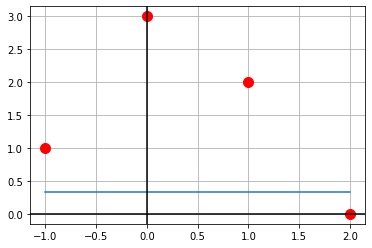

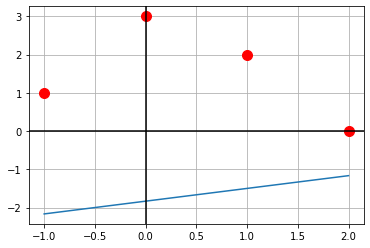

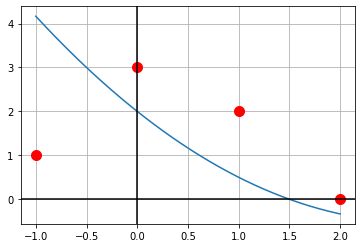

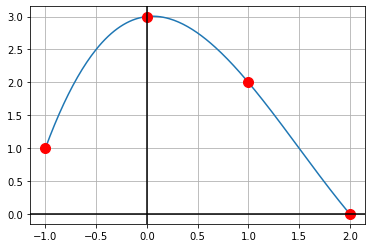

In [139]:
x = np.array([-1, 0, 1, 2]) # x coordinates in space
y = np.array([1, 3, 2, 0]) # f(x)

a = divided_diff(x, y)
print(a)

m=0
xs = np.linspace(-1,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=1
xs = np.linspace(-1,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=2
xs = np.linspace(-1,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=3
xs = np.linspace(-1,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

[-2.          2.         -1.4         0.48571429]


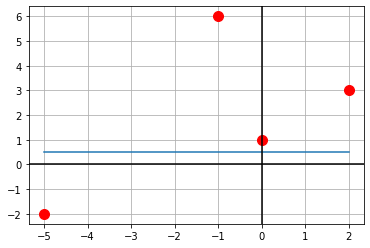

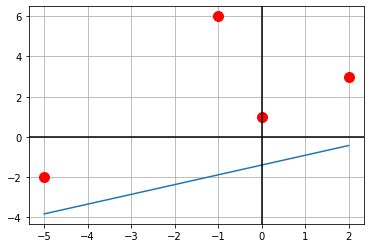

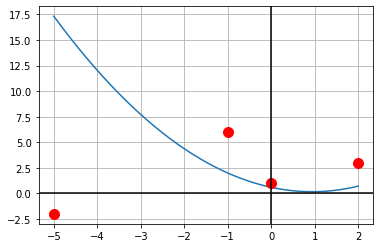

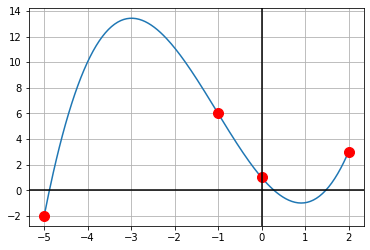

In [141]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

a = divided_diff(x, y)
print(a)

m=0
xs = np.linspace(-5,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=1
xs = np.linspace(-5,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=2
xs = np.linspace(-5,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()

m=3
xs = np.linspace(-5,2,200)
ys = newton_poly(a, x, xs, m)
plt.plot(xs,ys,x,y,'r.',ms=20)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.show()
